## Import Libraries

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [218]:
data = pd.read_csv("./Crop_recommendation.csv")
data.sample(n = 5)

,N,P,K,temperature,humidity,ph,rainfall,label
1641,0,23,15,22.566642,93.374889,7.598729,109.858575,orange
1237,38,138,204,25.111085,83.254476,6.325480,73.010268,grapes
1209,17,134,204,39.040720,80.183933,6.499605,73.884670,grapes
1324,83,29,52,25.764027,87.593113,6.704689,46.051227,watermelon
753,33,75,21,33.046880,68.938756,6.690655,62.302783,blackgram


## Data preprocessing

In [219]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [220]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## EDA

In [222]:
plt.style.use("fivethirtyeight")

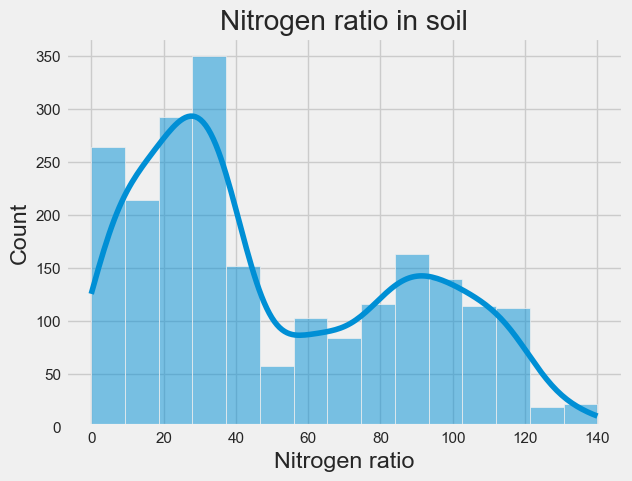

In [223]:
sns.histplot(x = "N", data = data, kde = True)
plt.xlabel("Nitrogen ratio")
plt.title("Nitrogen ratio in soil")
plt.show()

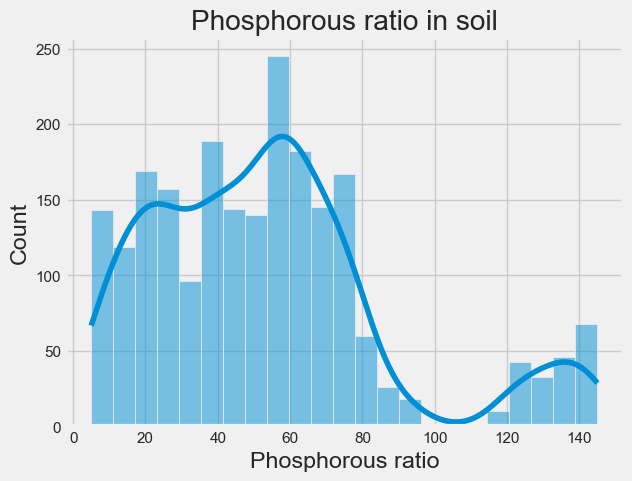

In [224]:
sns.histplot(x = "P", data = data, kde = True)
plt.xlabel("Phosphorous ratio")
plt.title("Phosphorous ratio in soil")
plt.show()

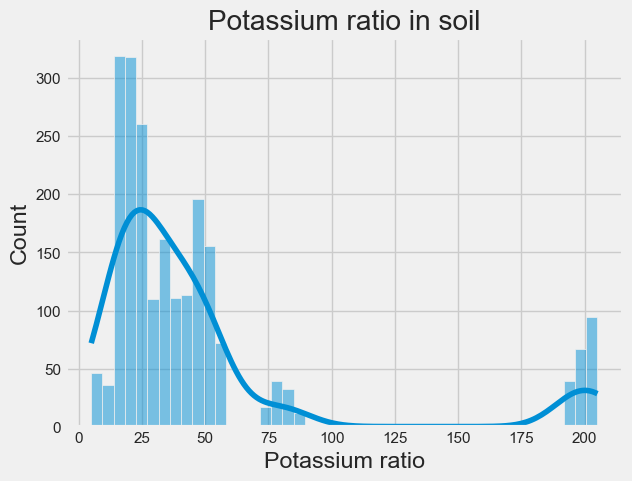

In [225]:
sns.histplot(x = "K", data = data, kde = True)
plt.xlabel("Potassium ratio")
plt.title("Potassium ratio in soil")
plt.show()

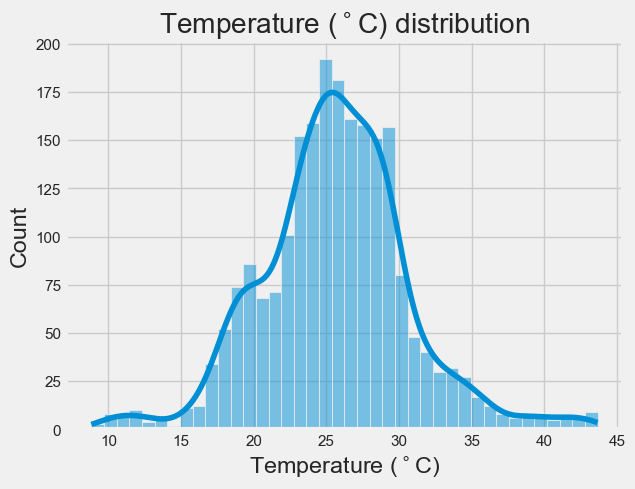

In [226]:
sns.histplot(x = "temperature", data = data, kde = True)
plt.xlabel("Temperature ($^\circ$C)")
plt.title("Temperature ($^\circ$C) distribution")
plt.show()

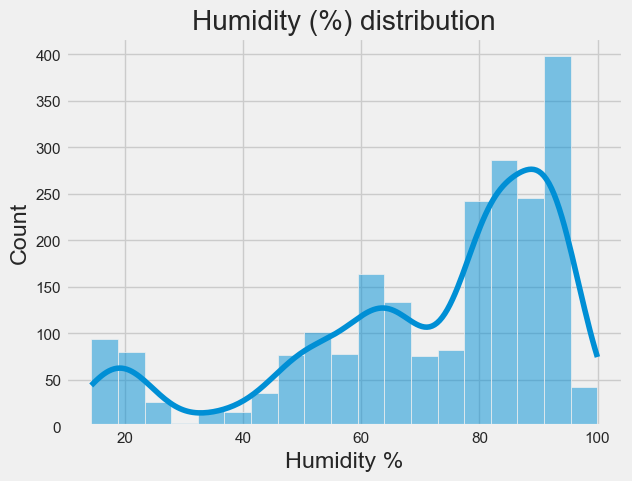

In [227]:
sns.histplot(x = "humidity", data = data, kde = True)
plt.xlabel("Humidity %")
plt.title("Humidity (%) distribution")
plt.show()

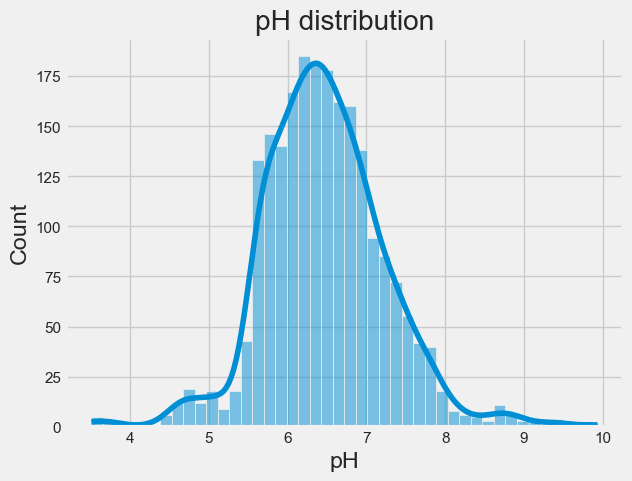

In [228]:
sns.histplot(x = "ph", data = data, kde = True)
plt.xlabel("pH")
plt.title("pH distribution")
plt.show()

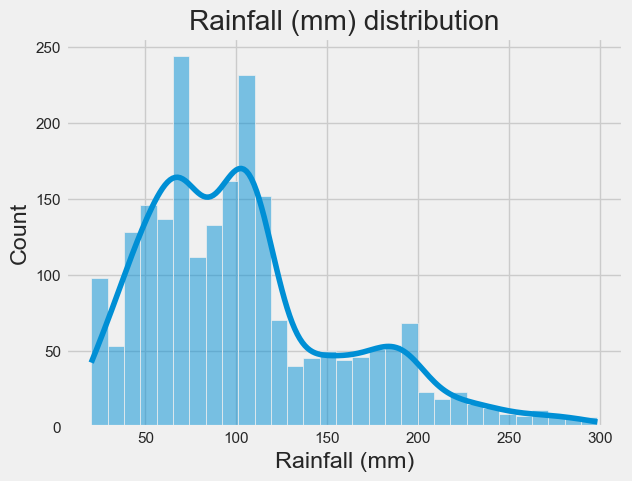

In [229]:
sns.histplot(x = "rainfall", data = data, kde = True)
plt.xlabel("Rainfall (mm)")
plt.title("Rainfall (mm) distribution")
plt.show()

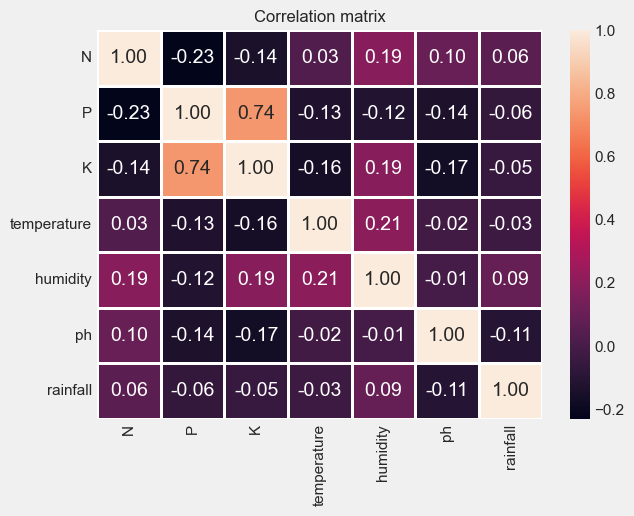

In [230]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt = '.2f', linewidths=1)
sns.set(font_scale = 1)
plt.title("Correlation matrix");

### **Check out Power BI dashboard for more**

## Feature and Label extraction

In [231]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Train and test set split

In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Label Encoding

In [233]:
len(np.unique(y)), len(np.unique(y_train)), len(np.unique(y_test))

(22, 22, 22)

In [234]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

## Feature Scaling

In [235]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Modelling

### `Random Forest`

In [236]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [237]:
y_pred = rfc.predict(X_test)

In [238]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix

In [239]:
print(f"Accuracy score : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision score : {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f"Recall score : {recall_score(y_test, y_pred, average='macro'):.3f}")
print(f"F1 score : {f1_score(y_test, y_pred, average='macro'):.3f}")

Accuracy score : 0.986
Precision score : 0.986
Recall score : 0.987
F1 score : 0.986


### `XGBoost`

In [240]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [241]:
y_pred = xgb.predict(X_test)

In [242]:
print(f"Accuracy score : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision score : {precision_score(y_test, y_pred, average='micro'):.3f}")
print(f"Recall score : {recall_score(y_test, y_pred, average='micro'):.3f}")
print(f"F1 score : {f1_score(y_test, y_pred, average='micro'):.3f}")

Accuracy score : 0.916
Precision score : 0.916
Recall score : 0.916
F1 score : 0.916


### `CatBoost`

In [243]:
from catboost import CatBoostClassifier

ctb = CatBoostClassifier()
ctb.fit(X_train, y_train)

Learning rate set to 0.081441
0:	learn: 2.5135974	total: 25.4ms	remaining: 25.4s
1:	learn: 2.1631455	total: 48.7ms	remaining: 24.3s
2:	learn: 1.9234428	total: 70.1ms	remaining: 23.3s
3:	learn: 1.7380158	total: 93.1ms	remaining: 23.2s
4:	learn: 1.5614783	total: 116ms	remaining: 23.1s
5:	learn: 1.4302767	total: 139ms	remaining: 23s
6:	learn: 1.3175770	total: 162ms	remaining: 23s
7:	learn: 1.2178999	total: 184ms	remaining: 22.8s
8:	learn: 1.1160184	total: 207ms	remaining: 22.8s
9:	learn: 1.0339991	total: 230ms	remaining: 22.7s
10:	learn: 0.9589132	total: 251ms	remaining: 22.6s
11:	learn: 0.8961862	total: 272ms	remaining: 22.4s
12:	learn: 0.8313825	total: 294ms	remaining: 22.3s
13:	learn: 0.7739145	total: 316ms	remaining: 22.3s
14:	learn: 0.7284444	total: 339ms	remaining: 22.3s
15:	learn: 0.6870247	total: 361ms	remaining: 22.2s
16:	learn: 0.6482519	total: 384ms	remaining: 22.2s
17:	learn: 0.6106635	total: 409ms	remaining: 22.3s
18:	learn: 0.5752329	total: 433ms	remaining: 22.3s
19:	learn: 

In [244]:
y_pred = ctb.predict(X_test)

In [245]:
print(f"Accuracy score : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision score : {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f"Recall score : {recall_score(y_test, y_pred, average='macro'):.3f}")
print(f"F1 score : {f1_score(y_test, y_pred, average='macro'):.3f}")

Accuracy score : 0.993
Precision score : 0.993
Recall score : 0.994
F1 score : 0.993


### `SVM Classifier linear`

In [246]:
from sklearn.svm import SVC

lsvc = SVC(kernel = 'linear')
lsvc.fit(X_train, y_train)

SVC(kernel='linear')

In [247]:
y_pred = lsvc.predict(X_test)

In [248]:
print(f"Accuracy score : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision score : {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f"Recall score : {recall_score(y_test, y_pred, average='macro'):.3f}")
print(f"F1 score : {f1_score(y_test, y_pred, average='macro'):.3f}")

Accuracy score : 0.989
Precision score : 0.989
Recall score : 0.989
F1 score : 0.988


### `SVC non-linear classifier`

In [249]:
from sklearn.svm import SVC

rsvc = SVC(kernel = 'rbf')
rsvc.fit(X_train, y_train)

SVC()

In [250]:
y_pred = rsvc.predict(X_test)

In [251]:
print(f"Accuracy score : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision score : {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f"Recall score : {recall_score(y_test, y_pred, average='macro'):.3f}")
print(f"F1 score : {f1_score(y_test, y_pred, average='macro'):.3f}")

Accuracy score : 0.980
Precision score : 0.979
Recall score : 0.981
F1 score : 0.978


### `Gradient Boosting`

In [252]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [253]:
y_pred = gbc.predict(X_test)

In [254]:
print(f"Accuracy score : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision score : {precision_score(y_test, y_pred, average='micro'):.3f}")
print(f"Recall score : {recall_score(y_test, y_pred, average='micro'):.3f}")
print(f"F1 score : {f1_score(y_test, y_pred, average='micro'):.3f}")

Accuracy score : 0.902
Precision score : 0.902
Recall score : 0.902
F1 score : 0.902


### `AdaBoost`

In [255]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [256]:
y_pred = ada.predict(X_test)

In [257]:
print(f"Accuracy score : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision score : {precision_score(y_test, y_pred, average='micro'):.3f}")
print(f"Recall score : {recall_score(y_test, y_pred, average='micro'):.3f}")
print(f"F1 score : {f1_score(y_test, y_pred, average='micro'):.3f}")

Accuracy score : 0.152
Precision score : 0.152
Recall score : 0.152
F1 score : 0.152


### `Decision Tree classifier`

In [258]:
from sklearn.tree import DecisionTreeClassifier

dstc = DecisionTreeClassifier()
dstc.fit(X_train, y_train)

DecisionTreeClassifier()

In [259]:
y_pred = dstc.predict(X_test)

In [260]:
print(f"Accuracy score : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision score : {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f"Recall score : {recall_score(y_test, y_pred, average='macro'):.3f}")
print(f"F1 score : {f1_score(y_test, y_pred, average='macro'):.3f}")

Accuracy score : 0.936
Precision score : 0.954
Recall score : 0.938
F1 score : 0.934


### Hyper parameter tuning the `SVC` model

In [261]:
from sklearn.model_selection import GridSearchCV

In [262]:
params = {
    'C' : np.arange(1, 20, 5),
    'kernel' : ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

In [263]:
grid = GridSearchCV(SVC(), param_grid = params, n_jobs = -1, verbose = 2, return_train_score = True, refit = True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 1,  6, 11, 16]),
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, verbose=2)

In [264]:
grid.best_score_

0.9875

In [265]:
grid.best_params_

{'C': 16, 'gamma': 0.1, 'kernel': 'rbf'}

In [266]:
grid.best_estimator_

SVC(C=16, gamma=0.1)

In [267]:
bsvc = SVC(C = 1, gamma = 1, kernel = 'rbf')
bsvc.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [268]:
best_pred = bsvc.predict(X_test)

In [269]:
print(f"Accuracy score : {accuracy_score(y_test, best_pred):.3f}")
print(f"Precision score : {precision_score(y_test, best_pred, average='macro'):.3f}")
print(f"Recall score : {recall_score(y_test, best_pred, average='macro'):.3f}")
print(f"F1 score : {f1_score(y_test, best_pred, average='macro'):.3f}")

Accuracy score : 0.991
Precision score : 0.990
Recall score : 0.992
F1 score : 0.991


## **`CatBoost Classifier`** performs best with accuracy **`0.993`**

In [270]:
import joblib

In [273]:
joblib.dump(bsvc, "best_model.pickle")

['best_model.pickle']